***SENTIMENT ANALYSIS***

Sentimental analysis on IMDB reviews using Machine Learning classifier(Logistic Regression, Naive Bayes, SVM) and Deep Learning Models(Deep Neural Network, RNN, CNN)
Sentiment analysis is very useful in social media monitoring. It helps companies extract insights from social media data. For example, a company can gain an overview of wider public opinion about a particular topic.
In this project, we will work on sentiment analysis of IMDB Movie Reviews.

Dataset:
IMDB(Internet Movie Database) contain 50k reviews,involve both negative and positive reviews. It is the world's most popular source of movie,TV and celebrity content. We can also find rating and reviews for the latest movies and TV shows. Dataset taken from Kaggle site.Link to the dataset https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The main aim of this project is evaluate some ML classifiers in sentiment analysis task for PREDICTION of sentiment from dataset. To tackle this problem has, made Bag of Words model and TFIDF model for machine learning classifier and three ML classifiers ( linear SVM, Naive Bayes, Deep Learning RNN LSTM classifier) as well as perform some text pre-processing techniques such as data cleaning,text normalization,steamming,stopwords removal on the IMDB movie reviews dataset.

At the end, we attempted to solve this problem by simple deep neural network architectures,(Recurrent neural network(LSTM)+dropout) architecture, 2-layer RNN(LSTM) architecture and CNN.

In [1]:
#*********deletele tfidf models,as they are giving more accuracy, no time to fix it****#

***Importing Libraries***

In [323]:
import pandas as pd #To read dataset/inputs in to dataframe
import seaborn as sns #To get visual representation of metrics/dataset
import matplotlib.pyplot as plt #To plot a graph
%matplotlib inline
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

from unidecode import unidecode #To clean text/data
import re #To clean text/data
from re import sub #To clean text/data

from sklearn.model_selection import train_test_split #Splitting the data

from sklearn.feature_extraction.text import CountVectorizer #For BoW using Countvectorizer

from sklearn.naive_bayes import MultinomialNB #Importing naive bayes model
import numpy as np #For array operations
from sklearn import metrics #For evaluation of metrics
from sklearn.metrics import classification_report,confusion_matrix #Generating classification report
import itertools #Used in Confusion matrix visualization
from sklearn.feature_extraction.text import TfidfVectorizer #For Tfidf model 
from sklearn.svm import LinearSVC #For importing SVM model
from tensorflow.keras.preprocessing.text import Tokenizer  #For Tokenizing
from tensorflow.keras.preprocessing.sequence import pad_sequences  #For sequence padding
import tensorflow as tf #For TensorFlow libraries
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout #LSTM architecture libraries
from tensorflow.keras.models import Sequential     #For the model
import os #For os functionalities
from tensorflow.keras.callbacks import ModelCheckpoint #For write the model
from tensorflow.keras.models import load_model #For loading model

***Loading Dataset***

After performing lot of experiments with raw Imdb datasets, we decided to use readily available IMDB dataset from Kaggle, which has the data required for this project. Experiments and work done on raw dataset is available in "Dataset.ipynb" file.

In [4]:
#Reading the data in csv file in to dataframe
df = pd.read_csv('Data/movie_data.csv')

In [13]:
#Exploring data
df.head()
#df.shape
#This shows our dataset has total 50,000 reviews with review and sentiment column

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [17]:
# Getting total number of positive and negative reviews from the datset

df['sentiment'].value_counts()

# 1- represents positive review
# 2- represents negative review

1    25000
0    25000
Name: sentiment, dtype: int64

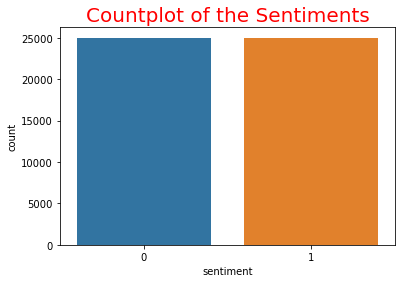

In [25]:
#This number shows us our dataset is balanced.
#Let's look in to the visuakization of the dataset

sns.countplot(df.sentiment)
plt.title('Countplot of the Sentiments', fontsize = 20, color = 'red')
plt.show()

***Data Preprocessing and Cleaning***

We performed few methods for cleaning the data and finally consolidated effective lines for preprocessing in "clean_data" function. All the experiments performed for preprocessing are in the "xxxx.ipynb" file

In [32]:
def clean_data(text,remove_polish_letters):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = remove_polish_letters(text)
    text = str(text)
    text = text.lower()

    # Clean the text
    text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    text = sub(r"\+", " plus ", text)
    text = sub(r",", " ", text)
    text = sub(r"\.", " ", text)
    text = sub(r"!", " ! ", text)
    text = sub(r"\?", " ? ", text)
    text = sub(r"'", " ", text)
    text = sub(r":", " : ", text)
    text = sub(r"\s{2,}", " ", text)

    #text = text.split()

    return text

#Applying clean_data to every review in our dataset
df.review = df.review.apply(lambda x: clean_data(x, unidecode))

In [34]:
df.head()

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


From the above output 3rd review is the example for the data cleaning before and after.

In [47]:
# we want pre process our dataset by applying the function we created

cleaned_review = []
phrases = list(df['review'])
for data in phrases:
    cleaned_review.append(clean_data(data,unidecode))

In [248]:
print("Review before cleaning\n", "***SPOILER*** Do not read this, if you think a...")
#Checking for 4th review
print("\n Review after cleaning\n",cleaned_review[2])

Review before cleaning
 ***SPOILER*** Do not read this, if you think a...

 Review after cleaning
  spoiler do not read this if you think about watching that movie although it would be a waste of time by the way the plot is so predictable that it does not make any difference if you read this or not anyway br / br / if you are wondering whether to see coyote ugly or not don t ! it s not worth either the money for the ticket or the vhs / dvd a typical chick feel good flick one could say the plot itself is as shallow as it can be a ridiculous and uncritical version of the american dream the young good looking girl from a small town becoming a big success in new york the few desperate attempts of giving the movie any depth fail such as the tragic accident of the father the difficulties of violet s relationship with her boyfriend and so on mcnally director tries to arouse the audience s pity and sadness put does not have any chance to succeed in this attempt due to the bad script and the sh

***Preparing the data for training***

In [249]:
#Reading all the values of corpus in to an array.

df_array = df.values
#print(df_array)

In [250]:
#Reading reviews in to X
X=df_array[:,0]

#Reading target positive or negative in y
y=df_array[:,1]
#Changing the type of y from string to int
y=y.astype('int')

Now our data is ready to split. For splitting we use skleran train_test_split.

***Splitting the data for training, testing***

In [251]:
# Splitting our data into train and test sets
# we will use 80% training set and 20% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False)

In [252]:
#Checking the shape of data splitted

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#X_train.shape
#y_train.shape
#X_test.shape
#y_test.shape

(40000,) (40000,)
(10000,) (10000,)


***Bags of words model***

In [253]:
#This model is used to convert text documents to numerical vectors or bag of words.

vec=CountVectorizer()
vec.fit(X_train)
#vec.vocabulary_
#print(vec.get_feature_names_out())
#print(len(vec.get_feature_names()))

#specifying upper and lower dims and removing stop words
vec=CountVectorizer(stop_words='english',min_df=.03,max_df=0.8)
vec.fit(X_train)
#vec.vocabulary_

#print(vec.get_feature_names())
#print(len(vec.get_feature_names()))

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

When we transform the matrix we get the sparse matrix which does not contain zeros and is a compressed format for easier computation. We use the command to .toarray() to get the ones and zeros back.

For train set:

In [254]:
x_train_transformed=vec.transform(X_train)
x_train_transformed

<40000x492 sparse matrix of type '<class 'numpy.int64'>'
	with 1426066 stored elements in Compressed Sparse Row format>

In [255]:
#converting transformed matrix to an array
x_train=x_train_transformed.toarray()

In [256]:
#This gives the representation of topics and words in the topics.
pd.DataFrame(x_train_transformed.toarray(),columns=vec.get_feature_names_out()).head()

,10,able,absolutely,act,acting,action,actor,actors,actress,actually,...,worth,wouldn,writer,writing,written,wrong,year,years,yes,young
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,3,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For Test set:

In [257]:
x_test_transformed=vec.transform(X_test)
x_test_transformed

<10000x492 sparse matrix of type '<class 'numpy.int64'>'
	with 358409 stored elements in Compressed Sparse Row format>

In [258]:
x_test=x_test_transformed.toarray()

In [259]:
pd.DataFrame(x_test_transformed.toarray(),columns=vec.get_feature_names_out()).head()

,10,able,absolutely,act,acting,action,actor,actors,actress,actually,...,worth,wouldn,writer,writing,written,wrong,year,years,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Term Frequency-Inverse Document Frequency model (TFIDF)***

In [266]:
#Tfidf vectorizer
tfidf = TfidfVectorizer(max_features = 5000)
X_tf= df['review']
y_tf = df['sentiment']

In [267]:
#Transforming all reviews before splitting
X_transform_tf = tfidf.fit_transform(X_tf)

In [268]:
X_transform_tf
#<50000x5000 sparse matrix 
#5000 is maxfeatures, 50,000 is number of reviews in dataset

<50000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5864299 stored elements in Compressed Sparse Row format>

***Splitting data for tfidf model***

In [269]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_transform_tf, y_tf, random_state=0, test_size=0.2, shuffle=False)

In [270]:
print("tf_train reviews ",X_train_tf.shape)
print("tf_test reviews ",X_test_tf.shape)

tf_train reviews  (40000, 5000)
tf_test reviews  (10000, 5000)


***Naive Bayes for Bag of Words and tfidf***

***Training***

In [203]:
#Training the model

mnb=MultinomialNB()
#In Multinomial NB method we give the inputs as x_train and y_train. Here alpha is the term used for laplacian smoothing by default it is 1. This is used to prevent the condition of zero probability.



***Predicting***

In [196]:
#fitting the model on training data of BoW
mnb_nv = mnb.fit(x_train_transformed,y_train)
#Predicting the model for Bag of Words
y_pred = mnb.predict(x_test)
#fitting the model on training data of tfidf
mnb_nv = mnb.fit(X_train_tf,y_train_tf)
y_pred_tf = mnb.predict(X_test_tf)

In [197]:
print("Predicted array",y_pred_tf)
print("Original array ",y_test_tf)

Predicted array [1 0 1 ... 0 1 1]
Original array  40000    1
40001    0
40002    1
40003    1
40004    0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 10000, dtype: int64


In [144]:
print("Predicted array",y_pred)
print("Original array ",y_test)

Predicted array [1 0 1 ... 0 1 1]
Original array  [1 0 1 ... 0 0 1]


In [145]:
#Getting the probability of predictions

probabilty_prediction=mnb.predict_proba(x_test_transformed)
probabilty_prediction
#The above output shows probabilities of prediction for '0' and '1'
print("Probability of first prediction is ",np.argmax(probabilty_prediction[0]))
#1 is positive review
#0 is negative review

Probability of first prediction is  1


***Evaluating***

In [199]:
print("Accuracy for Naive Bayes model on BoW",metrics.accuracy_score(y_test,y_pred))
print("Accuracy for Naive Bayes model on tfidf",metrics.accuracy_score(y_test_tf,y_pred_tf))

Accuracy for Naive Bayes model on BoW 0.8128
Accuracy for Naive Bayes model on tfidf 0.8483


In [202]:
print("Confusion Matrix for Naive Bayes Bow")
confusion=metrics.confusion_matrix(y_test,y_pred)
print(confusion)
print("Confusion Matrix for Naive Bayes tfidf")
confusion=metrics.confusion_matrix(y_test_tf,y_pred_tf)
print(confusion)

Confusion Matrix for Naive Bayes Bow
[[3995 1018]
 [ 854 4133]]
Confusion Matrix for Naive Bayes tfidf
[[4245  768]
 [ 749 4238]]


In [204]:
print("Classification Report for Naive Bayes Classifier for BoW\n\n",classification_report(y_test,y_pred))
print("Classification Report for Naive Bayes Classifier for tfidf\n\n",classification_report(y_test_tf,y_pred_tf))

Classification Report for Naive Bayes Classifier for BoW

               precision    recall  f1-score   support

           0       0.82      0.80      0.81      5013
           1       0.80      0.83      0.82      4987

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Classification Report for Naive Bayes Classifier for tfidf

               precision    recall  f1-score   support

           0       0.85      0.85      0.85      5013
           1       0.85      0.85      0.85      4987

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



***Confusion Matrix Visualization***

In [131]:
#Function to visualize confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[3995 1018]
 [ 854 4133]]
Confusion matrix, without normalization
[[4245  768]
 [ 749 4238]]


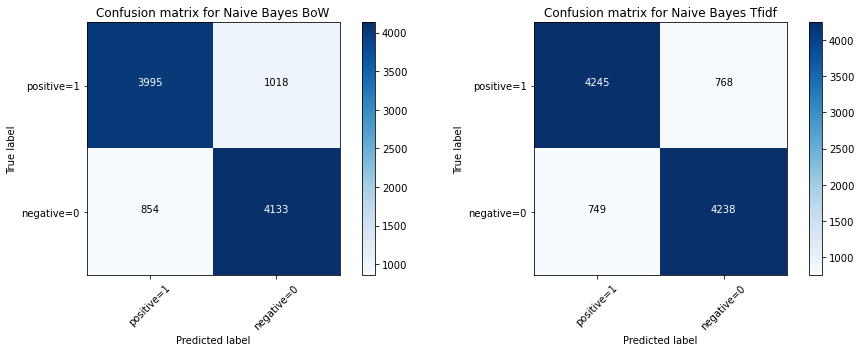

In [209]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix1 = confusion_matrix(y_test_tf, y_pred_tf)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for Naive Bayes BoW')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix1, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for Naive Bayes Tfidf')

***Naive Bayes Model on custom data***

In [210]:
#Took the reviews from Imdb website which as '6','5','10' ratings
#Ref:https://www.imdb.com/title/tt5433138/reviews?ref_=tt_sa_3
def predictNaive(Custom_review):
    #Custom_comment = "Awesome good mindblowing"
    comment = clean_data(Custom_review,unidecode)
    comm_trans = vec.transform([comment])
    print("Probabilities of predictions:",mnb.predict_proba(comm_trans))
    if np.argmax(mnb.predict_proba(comm_trans))==0:
        return "Negative Review"
    else:
        return "Positive Review"
    

In [123]:
#This review is originally rated 6 on the website

Custom_review =""" Why did you come here? What do you expect? The fast Saga - a movie that makes not much sense, but is pure "popcorn" if there is such a thing. We have new "milestones" ahead of us though. One is family related - pun intended, as is the cliche we get served here. Talking of cliches we get a beloved character back ... like they used to do in soaps ... because ... there are no rules.

Well no rules that the real world would set - boundaries and all that. I mean even Paul Walkers character is still alive in this - even if we never see him. He is family - and family holds together and never dies (are they Goonies?).

80s movie reference aside this is what fans should and probably will expect. Including the long awaited and completely insane ... well out of this world moment! And then add some of the most insane stunts and this should be one of the craziest (best?) movie/theatre experiences you can get.

Again it doesn't make much sense (or any to be fair), but it is fun to watch. And why should you not have fun ... the soundtrack is hot, the muscles and the cars are hot ... the players are hot ... there is literally nothing that is below "hot" ... well there is one moment that is described as cold ... fair enough, but other than that: Hot! Even new additions to the cast - ones that probably are going to return and some that are just flavor of the month/fan service ... get with it or leave it seems to be what the movie is suggesting ..."""
predictNaive(Custom_review)

Probabilities of predictions: [[0.04119541 0.95880459]]


'Positive Review'

In [126]:
#Below is the 1 rated review on the website

Custom_review = """ I am a huge fan of this franchise. And i watched all 9 movies again before F9. Here are my ratings for reference:

(1) original 8/10... (2) 2 fast 7/10... (3) tokyo drift 3/10... (4) fast & furious 7/10... (5) fast 5 - 8/10... (6) fast & furious 6 - 8/10... (7) furious 7 - 4/10... (8) fate 8/10... (9) hobbs and shaw 2/10...

in my review for hobbs and shaw, i said i hope f9 doesn't continue with the madness introduced in that movie. And in a way it doesn't. There are no super soldiers. And it doesn't switch to the sci-fi genre (for the most part). But in another way, it continues exactly where hobbs and shaw left off. Completely ridiculous action that is not the least bit believable and disregards the most basic laws of physics.

And i could tell from the first action scene. I tried to be patient, but it got worse and worse. This series has always pushed the limits, but they've lost all restraint and do whatever they want, no matter how stupid. I groaned and rolled my eyes so many times. Some parts were so dumb that i straight up closed my eyes for 5 seconds cause i couldn't handle it. And it's not just a random thing here or there. It's the majority of the action.

A quote from my hobbs and shaw review: "I always say the best action movies toe the line between improbable and impossible. To quote joey from friends, 'you're so far past the line that you can't even see the line! The line is a dot to you!' lmao."

On top of that, none of it is good. Even if you suspend disbelief, nothing about the action is impressive. Not one scene wowed me or gave me goosebumps. Even the fight scenes are crap. At one point i stopped caring about the action at all. And this is coming from an action junkie. By comparison, f8 had multiple BEASTLY action scenes that had my jaw dropped.

Aside from the action, this movie just isn't good. The story is useless. They tried to have character moments, but they didn't work for me. Which is odd because i'm already invested in all these characters. Most of the comedy doesn't work. And some of it is done at the expense of realism (they do something that makes no sense so they can joke about it).

My other biggest gripe: rewriting history. Apparently the trailer spoiled this, which is why i don't watch trailers. But they are pooping on their own franchise by changing past events. And you can argue that the franchise has done this before, but it was more of adding on to the story. Whereas with this movie, it really feels like they were pulling stuff out of their butts

did i mention it's really dumb? Unfathomably dumb. You know the overused phrase "i could feel myself getting dumber"? I really really could. I found myself mouth-breathing with my eye lids half shut lol

What a waste of charlize theron. I was so happy she survived f8. She's a BEAST of an actress (FURIOSA!), and i liked her villain. But she was literally in a box for the majority of the movie. Also, the Rock has become a staple of this franchise. Why is he not in this movie? Instead we get john cena. Sigh.

Racking my brain trying to come up with a positive. All i got is the musical score. Or at least one track was awesome. They played it during the end credits.

My entire theater clapped when it finished. Ppl are stupid. But that means we'll probably get another one. Hopefully they can right the ship. But i don't have much confidence in that happening.

There is so much more i can talk about. I can't remember it all. But i'm sad and disappointed. My wait for good post-pandemic movies continues. So far i can think of one (a quiet place 2). And that's out of like 15-20 movies i've seen. (1 viewing, 6/24/2021)"""

In [127]:
predictNaive(Custom_review)

Probabilities of predictions: [[9.99999507e-01 4.93021341e-07]]


'Negative Review'

In [129]:
# 8 rated review
Custom_review=""" I think the people in charge of IMDB should add Sci-Fi to the genres and I understand the hate. Regardless of the flaws especially one being there's probably 20 parts where some of the characters should've died I hope I'm not the only one to feel this way otherwise Fast 9 is exhilarating fun most of the way of through. A hilarious side note the theater I go to has recliner seats and someone fairly fat broke the seat to the right of me lol! The best aspects are the action, comedy, and the cinematography; the story is kinda cheesy. Like my review or don't but I'm being nice with my rating. Aww come on the review is good I mean the movie is pretty good."""
predictNaive(Custom_review)

Probabilities of predictions: [[0.07999621 0.92000379]]


'Positive Review'

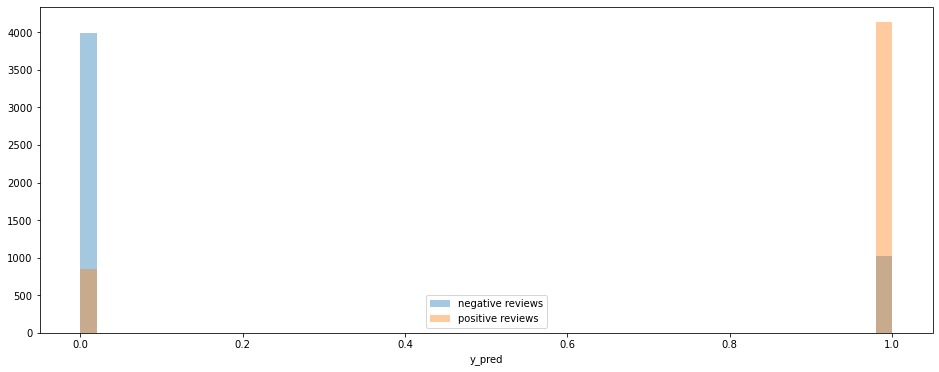

In [227]:
#Prediction for BoW Naive Bayes model

df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()



In [228]:
#From the above and below plots we can see that most of the negative reviews are predicted as negative but few of them are predicted as positive,
#and same for positive reviews too.
#One small difference is tfidf Naive Bayes model is having less number of false prediction compared BoW Naive Bayes Model.

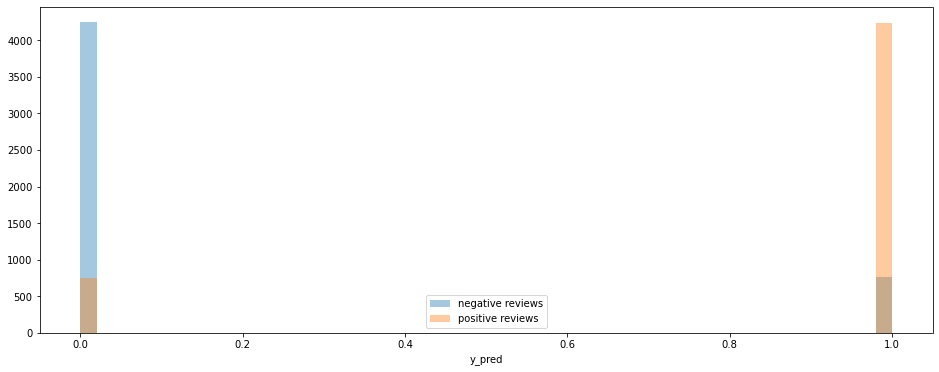

In [229]:
#Prediction for tfidf Naive Bayes model
df_pred = pd.DataFrame(data={'y_actual': y_test_tf, 'y_pred': y_pred_tf})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()



***SVM MODEL***

***Training***

In [276]:
svm = LinearSVC()
#Transfer Model


***Predicting***

In [279]:
#svm model for BoW
svm_nv=svm.fit(x_train_transformed,y_train)
y_pred_svm = svm_nv.predict(x_test_transformed)

In [280]:
#svm model for Tfidf
svm_tf=svm.fit(X_train_tf, y_train_tf)
y_pred_svm_tf=svm_tf.predict(X_test_tf)

In [281]:
print("Predicted values by svm BoW",y_pred_svm)
print("Original values by svm BoW",y_test)

print("Predicted values by svm Tfidf",y_pred_svm_tf)
print("Original values by svm Tfidf",y_test_tf)


Predicted values by svm BoW [1 1 1 ... 0 1 1]
Original values by svm BoW [1 0 1 ... 0 0 1]
Predicted values by svm Tfidf [1 0 1 ... 0 1 1]
Original values by svm Tfidf 40000    1
40001    0
40002    1
40003    1
40004    0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 10000, dtype: int64


***Evaluating***

In [284]:
print("Accuracy for svm model on BoW",metrics.accuracy_score(y_test,y_pred_svm))
print("Accuracy for svm model on tfidf",metrics.accuracy_score(y_test_tf,y_pred_svm_tf))

Accuracy for svm model on BoW 0.8319
Accuracy for svm model on tfidf 0.8843


In [285]:
print("Confusion Matrix for svm Bow")
confusion=metrics.confusion_matrix(y_test,y_pred_svm)
print(confusion)
print("Confusion Matrix for svm tfidf")
confusion=metrics.confusion_matrix(y_test_tf,y_pred_svm_tf)
print(confusion)

Confusion Matrix for svm Bow
[[4077  936]
 [ 745 4242]]
Confusion Matrix for svm tfidf
[[4435  578]
 [ 579 4408]]


In [286]:
print("Classification Report for svm Classifier for BoW\n\n",classification_report(y_test,y_pred_svm))
print("Classification Report for svm Classifier for tfidf\n\n",classification_report(y_test_tf,y_pred_svm_tf))

Classification Report for svm Classifier for BoW

               precision    recall  f1-score   support

           0       0.85      0.81      0.83      5013
           1       0.82      0.85      0.83      4987

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Classification Report for svm Classifier for tfidf

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      5013
           1       0.88      0.88      0.88      4987

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



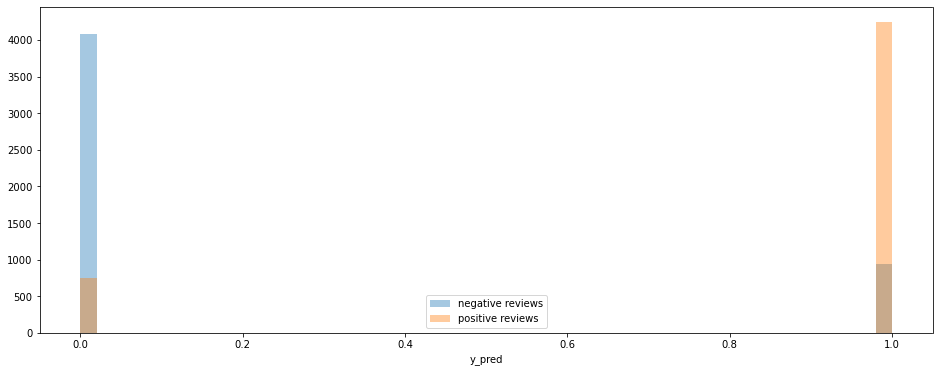

In [287]:
#Prediction for BoW svm model

df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred_svm})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()


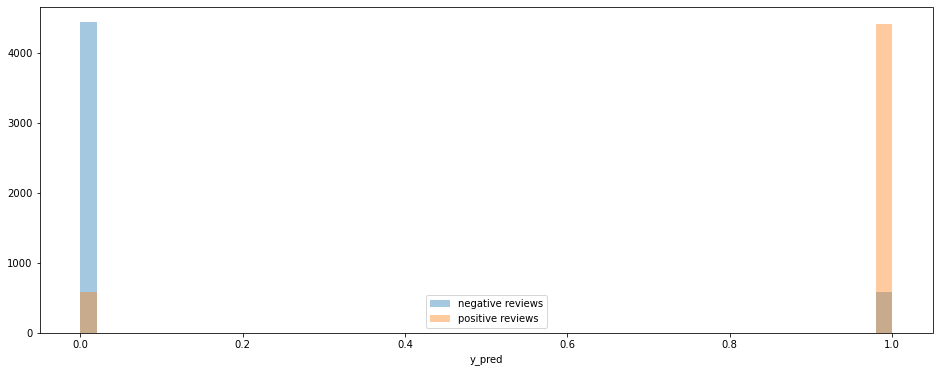

In [288]:
#Prediction for svm model for tfidf

df_pred = pd.DataFrame(data={'y_actual': y_test_tf, 'y_pred': y_pred_svm_tf})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()

Confusion matrix, without normalization
[[4077  936]
 [ 745 4242]]
Confusion matrix, without normalization
[[4435  578]
 [ 579 4408]]


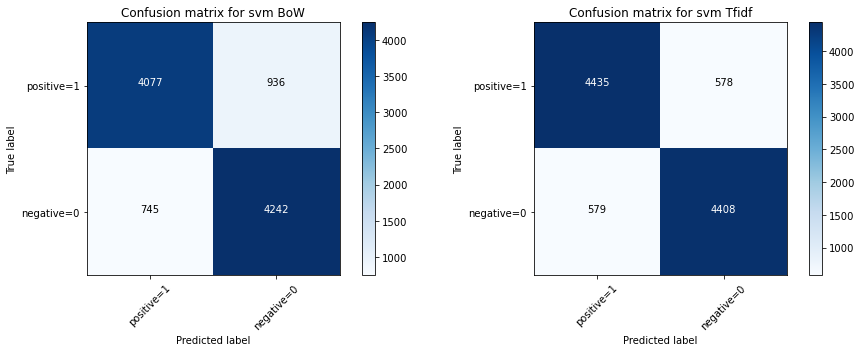

In [289]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
cnf_matrix1 = confusion_matrix(y_test_tf, y_pred_svm_tf)
#print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for svm BoW')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix1, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix for svm Tfidf')

***Predict on Custom Data***

***LSTM Model***

Detailed experiments on LSTM model are given in "LSTMExp.ipynb" file

In [354]:
df_array = df.values
#Reading reviews in to X
X=df_array[:,0]

#Reading target positive or negative in y
y=df_array[:,1]
#Changing the type of y from string to int
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [355]:
#Calculating max length for padding the sequence
def get_max_length():
    review_length = []
    for review in X_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [356]:
# The tokenizer module creates a word to index dictionary.
# Each word is used as key while the corresponding unique index,
# is used as the value for the key.

token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

max_length = get_max_length()


In [357]:
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

In [358]:
print('Encoded X Train\n', X_train, '\n')
print('Encoded X Test\n', X_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[ 281    3  295 ...   61   29  806]
 [  72   10   79 ...    0    0    0]
 [  72    8   13 ...    0    0    0]
 ...
 [  10  211   11 ...    1  253   12]
 [  11    6  161 ...   26  605  475]
 [  10  211   11 ... 1896   41 7893]] 

Encoded X Test
 [[6438    6    3 ...  118  938    8]
 [  10   14   42 ...    0    0    0]
 [ 566   66    6 ...    0    0    0]
 ...
 [7873   48    3 ... 1013   34    3]
 [  65   75 1026 ...    0    0    0]
 [1505   29  790 ...    0    0    0]] 

Maximum review length:  240


In [359]:
# ARCHITECTURE
# Create an embedding layer by specifying the parameters we created earlier
# Creating two Recurrent neural network layers
# Here we will use two LTSM (Long Term Short Term Memory) layers
# Bidirectional means the RNN processes sequence from start to end,and also backwards
# This makes the model perform better.
# We added another hidden layer and included an activation function as relu.
# Here we added Dropout to prevent the model from over fitting
# Dropout randomly removes some neurons in the hidden layers
# At the end we add a dense layer with sigmoid activation function.

# ARCHITECTURE
EMBED_DIM = 100
LSTM_OUT = 50

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT,return_sequences = True))
model.add(LSTM(25))

model.add(Dense(50,activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 240, 100)          9275700   
_________________________________________________________________
lstm_14 (LSTM)               (None, 240, 50)           30200     
_________________________________________________________________
lstm_15 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                1300      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 9,314,851
Trainable params: 9,314,851
Non-trainable params: 0
____________________________________________

In [360]:

file_name = 'model_LSTM.h5'
checkpoint_path =os.path.join('models',file_name)

call_backs = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path,
                                               monitor ='val_accuracy',
                                               verbose =1,
                                               save_freq='epoch',
                                               save_best_only = False,
                                               save_weights_only= False,
                                               mode = 'max')

In [320]:
history = model.fit(X_train, y_train, epochs= 10,
                    batch_size = 128, verbose = 1,
                   validation_split = 0.2,callbacks=call_backs)

Epoch 1/10
250/250 [==============================] - 236s 943ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6928 - val_accuracy: 0.5054

Epoch 00001: saving model to models\model_LSTM.h5
Epoch 2/10
250/250 [==============================] - 238s 952ms/step - loss: 0.6315 - accuracy: 0.6211 - val_loss: 0.4255 - val_accuracy: 0.8317

Epoch 00002: saving model to models\model_LSTM.h5
Epoch 3/10
250/250 [==============================] - 230s 922ms/step - loss: 0.3355 - accuracy: 0.8767 - val_loss: 0.2984 - val_accuracy: 0.8752

Epoch 00003: saving model to models\model_LSTM.h5
Epoch 4/10
250/250 [==============================] - 222s 886ms/step - loss: 0.2101 - accuracy: 0.9305 - val_loss: 0.2964 - val_accuracy: 0.8839

Epoch 00004: saving model to models\model_LSTM.h5
Epoch 5/10
250/250 [==============================] - 184s 735ms/step - loss: 0.1400 - accuracy: 0.9594 - val_loss: 0.3693 - val_accuracy: 0.8791

Epoch 00005: saving model to models\model_LSTM.h5
Epoch 6/10
250/

In [361]:
file_name = 'model_LSTM1.h5'
checkpoint_path =os.path.join('models',file_name)

call_backs = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path,
                                               monitor ='val_accuracy',
                                               verbose =1,
                                               save_freq='epoch',
                                               save_best_only = False,
                                               save_weights_only= False,
                                               mode = 'max')

In [362]:
history = model.fit(X_train, y_train, epochs= 5,
                    batch_size = 128, verbose = 1,
                   validation_split = 0.2,callbacks=call_backs)

Epoch 1/5
250/250 [==============================] - 237s 922ms/step - loss: 0.6930 - accuracy: 0.5138 - val_loss: 0.6926 - val_accuracy: 0.5343

Epoch 00001: saving model to models\model_LSTM1.h5
Epoch 2/5
250/250 [==============================] - 223s 890ms/step - loss: 0.6177 - accuracy: 0.6401 - val_loss: 0.3908 - val_accuracy: 0.8381

Epoch 00002: saving model to models\model_LSTM1.h5
Epoch 3/5
250/250 [==============================] - 218s 874ms/step - loss: 0.3240 - accuracy: 0.8825 - val_loss: 0.3136 - val_accuracy: 0.8714

Epoch 00003: saving model to models\model_LSTM1.h5
Epoch 4/5
250/250 [==============================] - 223s 891ms/step - loss: 0.2090 - accuracy: 0.9329 - val_loss: 0.3183 - val_accuracy: 0.8750

Epoch 00004: saving model to models\model_LSTM1.h5
Epoch 5/5
250/250 [==============================] - 224s 897ms/step - loss: 0.1478 - accuracy: 0.9585 - val_loss: 0.3541 - val_accuracy: 0.8710

Epoch 00005: saving model to models\model_LSTM1.h5


In [ ]:
'''history = model.fit(X_train, y_train, epochs= 2,
                    batch_size = 128, verbose = 1,
                   validation_split = 0.2,callbacks=call_backs)'''

***Evaluating LSTM***

In [365]:
def predict(path):
    y_pred= []
    loaded_model = load_model(path)
    pred = loaded_model.predict(X_test)
    
    for i in pred:
        if i>0.5:

            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred
        

In [376]:
#predict('models/model_LSTM.h5')
#predict('models/model_LSTM1.h5')

In [371]:
#print("Accuracy for LSTM is",metrics.accuracy_score(y_test,y_pred_svm))
print("Accuracy for LSTM1 is",metrics.accuracy_score(y_test,y_pred))

Accuracy for LSTM1 is 0.4991


In [327]:
print("Confusion Matrix for LSTM")
confusion=metrics.confusion_matrix(y_test,y_pred_svm)
print(confusion)

Confusion Matrix for LSTM
[[4077  936]
 [ 745 4242]]


In [328]:
print("Classification report for LSTM model\n\n")
print(classification_report(y_test,y_pred))

Classification report for LSTM model


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5013
           1       0.80      0.83      0.82      4987

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



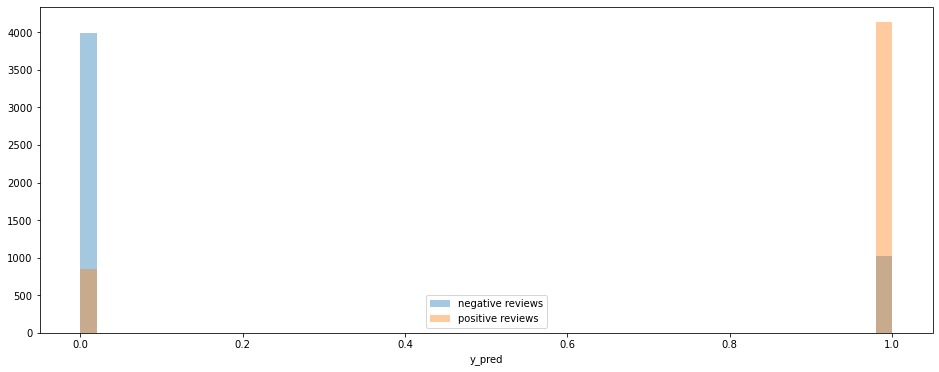

In [329]:
#Prediction for LSTM model
y_pred = y_pred.reshape(y_pred.shape[0],)
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_pred})

plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)


plt.legend()


In [331]:
#Plot ROC, AUC from LSTMExp.ipynb

Conclusion:
Accuracy using Multinomial Naive Bayes(BOW) is 81%.

Accuracy using Svm(BOW) is 83%.

Accuracy using Recurrent neural network(RNN) with LSTM and dropout is 83%

LSTM model gives best accuracy among all with 83.19% on training and testing dataset.
Using the RNN(LSTM) with two hidden layer is also best which yield 82% accuracy on both training and testing dataset.
Neural Network models effective for sentiment analysis on IMDB reviews.
Optimizing the model furthur may may yield better result using more data.